<a href="https://colab.research.google.com/github/jofella/Google-Colab/blob/main/SimpleGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulating Titan's Price using GBM

In [1]:
#Load packages
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
#Load ts
df = yf.download("TITAN.NS", start="2022-01-01", end="2023-01-31")

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': "Titan's returns"}, xlabel='Date'>

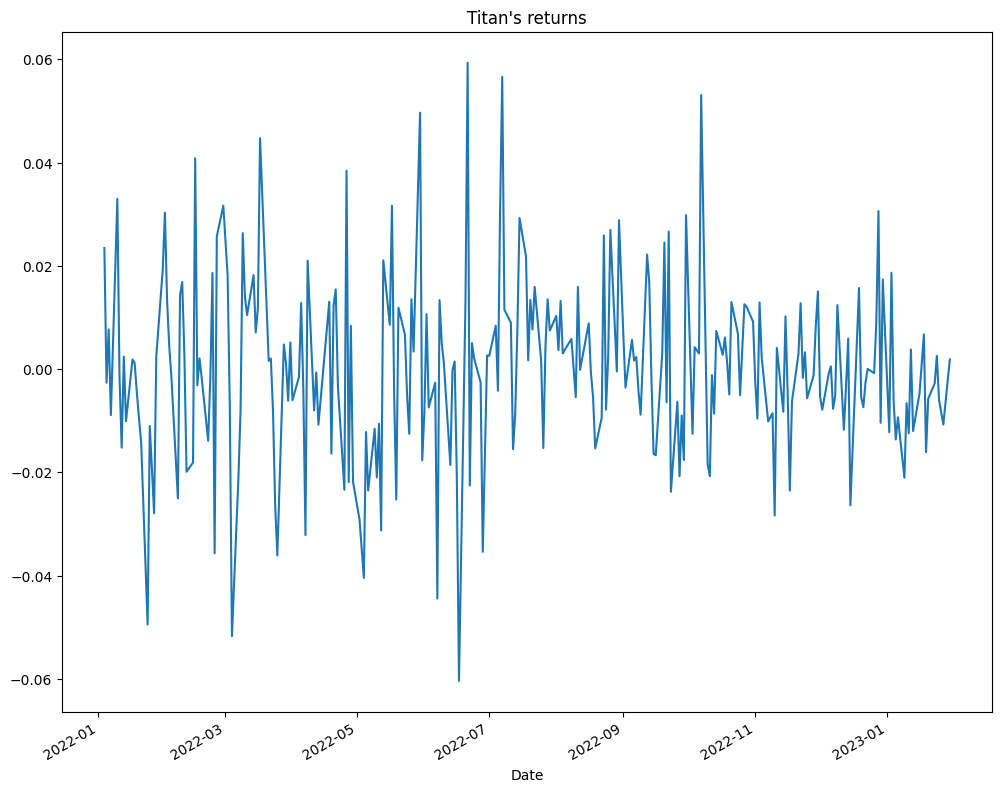

In [7]:
#Get the returns
returns = df["Adj Close"].pct_change().dropna()
returns.plot(title="Titan's returns", figsize=(12,10))

In [10]:
#Cut ts in Training and Test set
train = returns["2022"]
test = returns["2023"]

**GBM Formula**

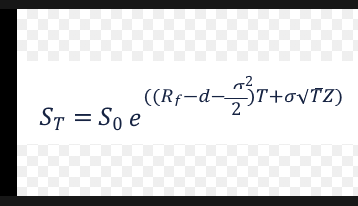

In [22]:
#Define the parameters
T = len(test) #Time to Maturity
N = len(test) #Days
S_0 = df.loc[train.index[-1], "Adj Close"] #Starting point
N_SIM = 100 #Simulation steps
mu = train.mean() #Mean of training set or base data
sigma = train.std() #Standart deviation

In [30]:
#Defining of GBM function
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=42):
  np.random.seed(random_seed)
  dt = T/N
  dW = np.random.normal(scale=np.sqrt(dt), size=(n_sims, N))
  W = np.cumsum(dW, axis=1)
  time_step = np.linspace(dt, T, N)
  time_steps = np.broadcast_to(time_step, (n_sims, N))
  S_t = (
      s_0 * np.exp((mu - 0.5 * sigma **2) * time_steps + sigma *W ))
  S_t = np.insert(S_t, 0, s_0, axis=1)
  return S_t

In [32]:
#Simulating GBM
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
sim_df = pd.DataFrame(np.transpose(gbm_simulations), index = train.index[-1:].union(test.index))

In [35]:
#Add labels to Dataframe
res_df = sim_df.mean(axis=1).to_frame()
res_df = res_df.join(df["Adj Close"])
res_df.columns = ["simulation_average", "adj_close_price"]

<Axes: title={'center': "Simulation's results"}, xlabel='Date'>

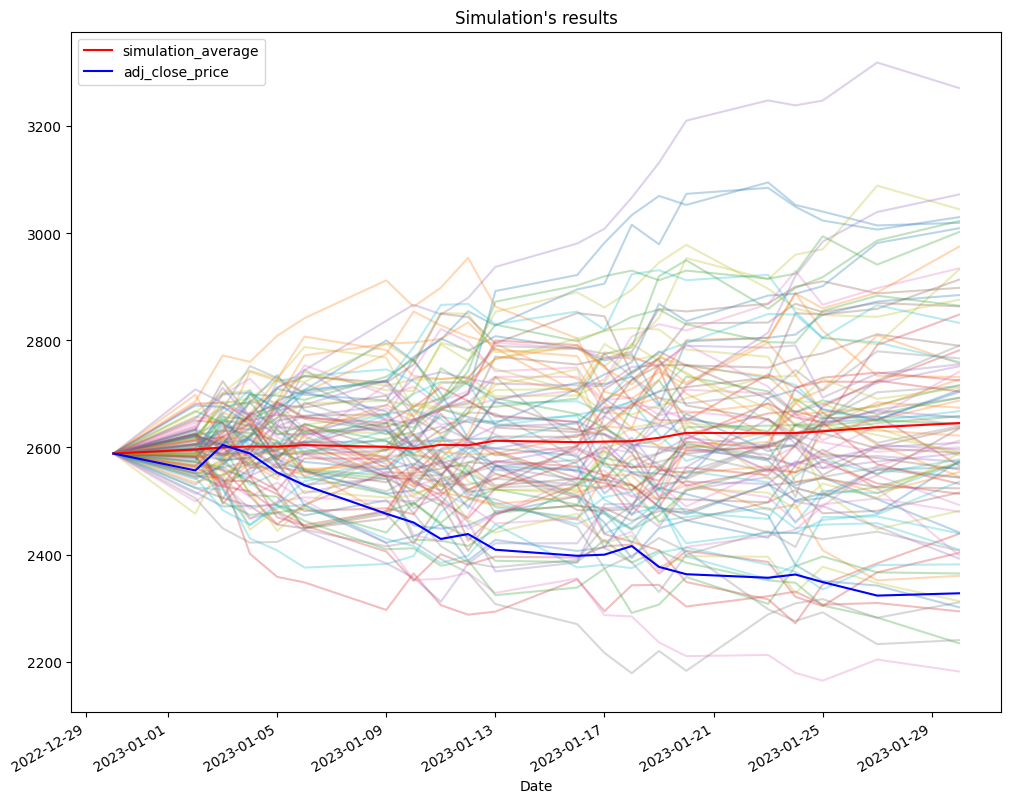

In [36]:
#Plot the result
ax = sim_df.plot(
    alpha=0.3, legend=False, title="Simulation's results"
)
res_df.plot(ax=ax, color=["red", "blue"], figsize=(12,10))